<div style="width:100%;height:125px;text-align:center;border: 4px solid #B5BD42;background-color:#B5BD42;color:white">

<header style="width:100%;height:140px;">
  <h1>Chapter 8</h1>
    <h1><b>Regularization</b></h1>
</header>

<div> 

# brief contents:

<div style="position: relative;height:100px;">
    
<div  style="width:300px;position:absolute;left: auto;border: 4px solid white;background-color:#B5BD42;color:white">
    <header></header>
    <a href="#Regularization" style="padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Regularization</b></h4>
      </a>
 </div>
    
 <div style="width:300px;position:absolute;left: 305px;border: 4px solid white;background-color:#B5BD42;color:whitee">
    <header></header>
    <a href="#Datae"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Data</b></h4>
      </a>
     
  </div>
    <div style="width:300px;position:absolute;left: 610px;border: 4px solid white;background-color:#B5BD42;color:white">
    <header></header>
    <a href="#L1"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>L1 (Lasso) Regularization</b></h4>
      </a>
        </div>

    
   <div  style="width:300px;position:absolute;left: 915px;border: 4px solid white;background-color:#B5BD42;color:white">
    <header></header>
    <a href="#L2"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>L2 (Lasso) Regularization</b></h4>
      </a>
    </div>
  
    
   <div  style="width:300px;position:absolute;left: 1220px;border: 4px solid white;background-color:#B5BD42;color:white">
    <header></header>
    <a href="#plus"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Plus Theory</b></h4>
      </a>
    </div>
</div>
<!------------------------------------------------------------------------------------------------------------------------>

<div id="Regularization" style="width:100%;height:70px;border: 4px solid #B5BD42;background-color:#B5BD42;color:white;text-align:center;border-radius: 25px;padding:3px" ><h1>Regularization<h1></div>

In [18]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if (val == False) else 'black'
    return 'color: %s' % color

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    r2 = r.style.applymap(color_negative_red)
    display(r2)
    print("Intercept: {}".format(intercept))
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

<div id="Data" style="width:100%;height:70px;border: 4px solid #B5BD42;background-color:#B5BD42;color:white;text-align:center;border-radius: 25px;padding:3px" ><h1>Data<h1></div>


In [3]:
import pandas as pd

from farhad_DL.utility import missing_median, encode_text_dummy, to_xy
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('data/auto-mpg.csv', na_values=['NA',"?"])
df.sample(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
380,36.0,4,120.0,88.0,2160,14.5,82,3,nissan stanza xe
184,25.0,4,140.0,92.0,2572,14.9,76,1,capri ii
381,36.0,4,107.0,75.0,2205,14.5,82,3,honda accord


In [8]:
missing_median(df, 'horsepower')
df.drop('name',axis=1, inplace=True)

encode_text_dummy(df, 'origin')

x,y = to_xy(df, 'mpg')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [23]:
from farhad_DL.utility import report_coef
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

import  numpy as np

Final score (RMSE): 2.985395908355713


,coef,positive
origin-1,-1.956707,False
cylinders,-0.122704,False
horsepower,-0.011298,False
weight,-0.006839,False
displacement,0.016188,True
acceleration,0.074705,True
year,0.815670,True
origin-3,0.934510,True
origin-2,1.022198,True


Intercept: [-19.760324]


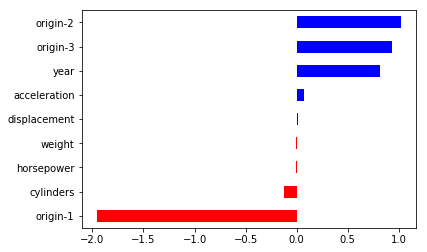

In [26]:
regression = LinearRegression()

regression.fit(x_train,y_train)

pred = regression.predict(x_test)

#sco = accuracy_score(pred, y_test)
score= np.sqrt(mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))
#print("Final accuracy : {}".format(sco))

names = list(df.columns.values)
names.remove("mpg")

report_coef(names,regression.coef_[0,:],regression.intercept_)

<div id="L1" style="width:100%;height:70px;border: 4px solid #B5BD42;background-color:#B5BD42;color:white;text-align:center;border-radius: 25px;padding:3px" ><h1>L1 (Lasso) Regularization<h1></div>

L1 Regularization, also called LASSO (Least Absolute Shrinkage and Selection Operator) is should be used to create sparsity in the neural network. In other words, the L1 algorithm will push many weight connections to near 0. When a weight is near 0, the program drops it from the network. Dropping weighted connections will create a sparse neural network.
Feature selection is a useful byproduct of sparse neural networks. Features are the values that the training set provides to the input neurons. Once all the weights of an input neuron reach 0, the neural network training determines that the feature is unnecessary. If your data set has a large number of input features that may not be needed, L1 regularization can help the neural network detect and ignore unnecessary features.
L1 is implemented by adding the following error to the objective to minimize:
$$ E_1 = \alpha \sum_w{ |w| } $$
The following code demonstrates lasso regression. Notice the effect of the coefficients compared to the previous section that used linear regression.

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from farhad_DL.utility import report_coef

import numpy as np

Final score (RMSE) :  2.9955385


,coef,positive
origin-1,-2.071795,False
horsepower,-0.008634,False
weight,-0.006719,False
cylinders,-0.000000,True
origin-2,0.000000,True
origin-3,0.000000,True
displacement,0.009198,True
acceleration,0.047096,True
year,0.799727,True


Intercept: [-17.628927]


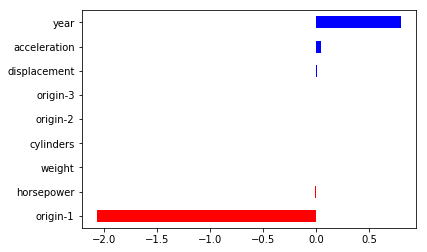

In [28]:
regression = Lasso(random_state=42, alpha=0.1)
regression.fit(x_train,y_train)

pred = regression.predict(x_test)

score = np.sqrt(mean_squared_error(pred, y_test))
print("Final score (RMSE) : ", score)

names = list(df.columns.values)
names.remove("mpg")

report_coef(names,regression.coef_[0:],regression.intercept_)

# <b>change Alpha

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV;
from sklearn.linear_model import Lasso;
from sklearn.model_selection import KFold;
from sklearn.model_selection import cross_val_score;

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

(1e-08, 100000000.0)

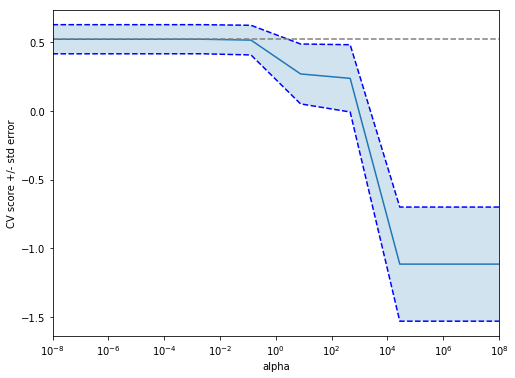

In [38]:


lasso = Lasso(random_state=42);
alphas = np.logspace(-8, 8, 10);

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha;
    this_scores = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1);
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores);

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

<div id="L2" style="width:100%;height:70px;border: 4px solid #B5BD42;background-color:#B5BD42;color:white;text-align:center;border-radius: 25px;padding:3px" ><h1>L2 (Ridge) Regularization<h1></div>

You should use Tikhonov/Ridge/L2 regularization when you are less concerned about creating a space network and are more concerned about low weight values. The lower weight values will typically lead to less overfitting.
$$ E_2 = \alpha \sum_w{ w^2 } $$
Like the L1 algorithm, the $\alpha$ value determines how important the L2 objective is compared to the neural network’s error. Typical L2 values are below 0.1 (10%). The main calculation performed by L2 is the summing of the squares of all of the weights. The bias values are not summed.
The following code uses L2 with linear regression (Ridge regression):

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import numpy as np

Final score (RMSE): 2.984790325164795


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.18198e-09): result may not be accurate.
  overwrite_a=True).T


,coef,positive
origin-1,-1.920357,False
cylinders,-0.116725,False
horsepower,-0.010981,False
weight,-0.006838,False
displacement,0.015813,True
acceleration,0.074798,True
year,0.815132,True
origin-3,0.917399,True
origin-2,1.002795,True


Intercept: [-19.730875]


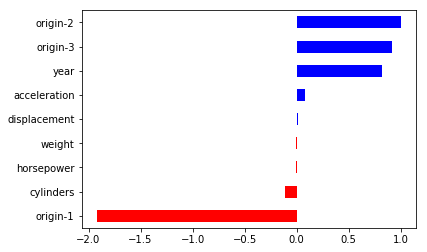

In [45]:

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

names = list(df.columns.values);
names.remove("mpg");
report_coef(
  names,
  regressor.coef_[0,:],
  regressor.intercept_);

In [46]:
from sklearn.linear_model import ElasticNet

Final score (RMSE): 2.997210741043091


,coef,positive
origin-1,-1.282887,False
weight,-0.006813,False
horsepower,-0.005499,False
cylinders,-0.000000,True
displacement,0.008664,True
acceleration,0.072615,True
origin-3,0.562695,True
origin-2,0.609081,True
year,0.802256,True


Intercept: [-18.872026]


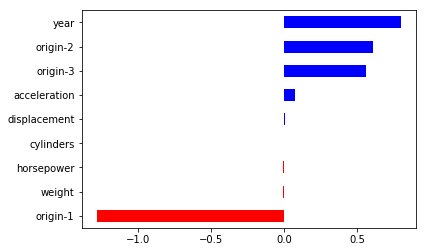

In [48]:
# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

names = list(df.columns.values)
names.remove("mpg")
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

<div id="plus" style="width:100%;height:70px;border: 4px solid #179871;background-color:#179871;color:white;text-align:center;border-radius: 25px;padding:3px" ><h1>+PLus Theory<h1></div>

In [30]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model.coordinate_descent:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : boolean, optional, default True
 |      Whether to calculate the intercept for th

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
    
https://pandas.pydata.org/pandas-docs/stable/style.html
</div>
